<a href="https://colab.research.google.com/github/daksh212004/ml-projects/blob/main/FaceDetection_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls


'106467352-1585602933667virus-medical-flu-mask-health-protection-woman-young-outdoor-sick-pollution-protective-danger-face_t20_o07dbe (1).jpg'
 Baby-Face-02.jpg
 data
 face-mask-dataset.zip
 kaggle.json
 sample_data


In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split



In [ ]:
with_mask=os.listdir('/content/data/with_mask')
without_mask=os.listdir('/content/data/without_mask')

In [ ]:
print(with_mask)

['with_mask_1359.jpg', 'with_mask_1720.jpg', 'with_mask_2776.jpg', 'with_mask_1605.jpg', 'with_mask_2265.jpg', 'with_mask_3681.jpg', 'with_mask_2695.jpg', 'with_mask_3708.jpg', 'with_mask_462.jpg', 'with_mask_18.jpg', 'with_mask_1758.jpg', 'with_mask_1220.jpg', 'with_mask_2986.jpg', 'with_mask_1536.jpg', 'with_mask_3535.jpg', 'with_mask_1003.jpg', 'with_mask_1306.jpg', 'with_mask_934.jpg', 'with_mask_1872.jpg', 'with_mask_2953.jpg', 'with_mask_1550.jpg', 'with_mask_2337.jpg', 'with_mask_2823.jpg', 'with_mask_300.jpg', 'with_mask_3228.jpg', 'with_mask_2700.jpg', 'with_mask_3158.jpg', 'with_mask_240.jpg', 'with_mask_2629.jpg', 'with_mask_962.jpg', 'with_mask_1826.jpg', 'with_mask_3323.jpg', 'with_mask_2631.jpg', 'with_mask_2503.jpg', 'with_mask_20.jpg', 'with_mask_3601.jpg', 'with_mask_2849.jpg', 'with_mask_3170.jpg', 'with_mask_909.jpg', 'with_mask_425.jpg', 'with_mask_1020.jpg', 'with_mask_1286.jpg', 'with_mask_2229.jpg', 'with_mask_548.jpg', 'with_mask_128.jpg', 'with_mask_2240.jpg', 

In [ ]:
print(without_mask)

['without_mask_1998.jpg', 'without_mask_787.jpg', 'without_mask_2268.jpg', 'without_mask_3407.jpg', 'without_mask_2213.jpg', 'without_mask_2125.jpg', 'without_mask_198.jpg', 'without_mask_1121.jpg', 'without_mask_803.jpg', 'without_mask_3324.jpg', 'without_mask_3345.jpg', 'without_mask_1394.jpg', 'without_mask_74.jpg', 'without_mask_873.jpg', 'without_mask_1521.jpg', 'without_mask_1210.jpg', 'without_mask_1052.jpg', 'without_mask_2185.jpg', 'without_mask_3162.jpg', 'without_mask_2459.jpg', 'without_mask_2464.jpg', 'without_mask_2984.jpg', 'without_mask_1391.jpg', 'without_mask_2643.jpg', 'without_mask_3390.jpg', 'without_mask_3472.jpg', 'without_mask_820.jpg', 'without_mask_3063.jpg', 'without_mask_2951.jpg', 'without_mask_382.jpg', 'without_mask_454.jpg', 'without_mask_2419.jpg', 'without_mask_1234.jpg', 'without_mask_1799.jpg', 'without_mask_1489.jpg', 'without_mask_2211.jpg', 'without_mask_308.jpg', 'without_mask_260.jpg', 'without_mask_3761.jpg', 'without_mask_1749.jpg', 'without_m

In [ ]:
print("number of with_mask images ",len(with_mask))
print("number of without_mask images",len(without_mask))

number of with_mask images  3725
number of without_mask images 3828


In [ ]:
with_mask_labels=[1]*3725
without_mask_labels=[0]*3828
labels=with_mask_labels+without_mask_labels
print(len(labels))

7553


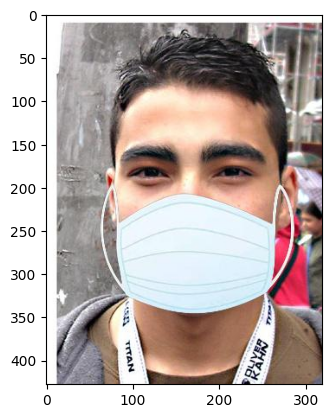

In [ ]:
img=mpimg.imread('/content/data/with_mask/with_mask_1720.jpg')
img1=plt.imshow(img)

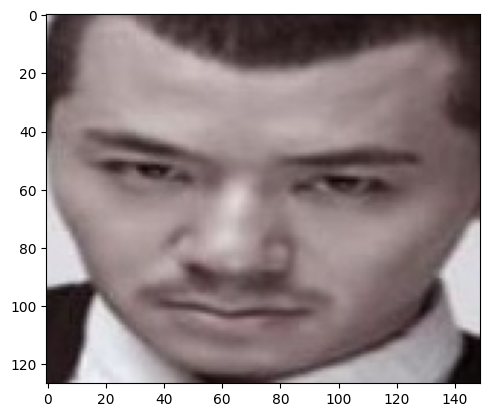

In [ ]:
img=mpimg.imread('/content/data/without_mask/without_mask_100.jpg')
img1=plt.imshow(img)

In [ ]:
with_mask_path='/content/data/with_mask/'
data=[]
for img in with_mask:
  image=Image.open(with_mask_path+img)#image reading
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
without_mask_path='/content/data/without_mask/'
for img in without_mask:
  image=Image.open(without_mask_path+img)#image reading
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)

In [ ]:
len(data)

7553

In [ ]:
type(data)

list

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
X=np.array(data)
Y=np.array(labels)

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [ ]:
print(X_train_scaled[0])

[[[0.96078431 0.89803922 0.8       ]
  [0.96078431 0.89803922 0.8       ]
  [0.96078431 0.89411765 0.8       ]
  ...
  [0.17647059 0.16078431 0.14901961]
  [0.19607843 0.18039216 0.17647059]
  [0.19215686 0.17647059 0.17254902]]

 [[0.96078431 0.88627451 0.79215686]
  [0.94901961 0.88235294 0.78431373]
  [0.94509804 0.8745098  0.78039216]
  ...
  [0.14901961 0.12941176 0.11764706]
  [0.16470588 0.14901961 0.13333333]
  [0.16862745 0.15294118 0.14117647]]

 [[0.94901961 0.87058824 0.76862745]
  [0.9372549  0.86666667 0.76470588]
  [0.9372549  0.85882353 0.76078431]
  ...
  [0.13333333 0.09803922 0.09411765]
  [0.1372549  0.10196078 0.09019608]
  [0.1372549  0.11372549 0.10196078]]

 ...

 [[0.51372549 0.42745098 0.25490196]
  [0.51764706 0.43529412 0.2627451 ]
  [0.51372549 0.43137255 0.2627451 ]
  ...
  [0.6        0.51372549 0.36862745]
  [0.60784314 0.52156863 0.37647059]
  [0.61568627 0.52941176 0.38431373]]

 [[0.48627451 0.39607843 0.22352941]
  [0.49803922 0.40784314 0.23529412]


Building a Convolutional Neural Network

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes=2
model=keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes,activation='sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',loss=keras.losses.SparseCategoricalCrossentropy,metrics=['acc'])

In [ ]:
history=model.fit(X_train_scaled,Y_train,validation_split=0.1,epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - acc: 0.7434 - loss: 0.5804 - val_acc: 0.8959 - val_loss: 0.2481
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - acc: 0.8713 - loss: 0.3182 - val_acc: 0.9157 - val_loss: 0.2290
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9041 - loss: 0.2544 - val_acc: 0.9140 - val_loss: 0.2189
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - acc: 0.9187 - loss: 0.2093 - val_acc: 0.9273 - val_loss: 0.1792
Epoch 5/5
121/170 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - acc: 0.9419 - loss: 0.1541

In [ ]:
loss,accuracy=model.evaluate(X_test_scaled,Y_test)

In [ ]:
h=history
plt.plot(h.history['loss'],label='trainloss')
plt.plot(h.history['val_loss'],label='valloss')
plt.legend()
plt.show()

In [ ]:
h=history
plt.plot(h.history['acc'],label='trainacc')
plt.plot(h.history['val_acc'],label='valacc')
plt.legend()
plt.show()

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
input_path='/content/106467352-1585602933667virus-medical-flu-mask-health-protection-woman-young-outdoor-sick-pollution-protective-danger-face_t20_o07dbe (1).jpg'

input_image = cv2.imread(input_path)
cv2_imshow(input_image)
input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)
print(input_prediction)
input_pred_label = np.argmax(input_prediction)

if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

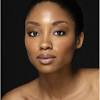

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[[0.2912816  0.58893704]]
The person in the image is wearing a mask


In [ ]:
input_path='/content/data/without_mask/without_mask_1007.jpg'

input_image = cv2.imread(input_path)
cv2_imshow(input_image)
input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)
print(input_prediction)
input_pred_label = np.argmax(input_prediction)

if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')